In [9]:
import os
import torch
import numpy as np
from glob import glob
from tqdm.auto import tqdm
from sklearn.linear_model import LogisticRegression
import pandas as pd
from utils.store_data import ReadData
import numpy as np
import torch
from utils.arguments import Arguments
from tqdm import tqdm
from linear_probe import get_linear_acc
import random
import os
from sklearn.metrics import roc_auc_score,accuracy_score,roc_curve

In [39]:
pope_results=np.load('./pope_layers.npy',allow_pickle=True)
pope_scores=[x['score'] for x in pope_results if x['n_components'] == 1]
pope_scores,len(pope_scores)

([np.float64(0.5021145607330477),
  np.float64(0.4414420863665899),
  np.float64(0.49249303406425177),
  np.float64(0.5027946343021399),
  np.float64(0.49138757034769104),
  np.float64(0.49594984526261304),
  np.float64(0.4876815823962819),
  np.float64(0.4818775537175519),
  np.float64(0.5177232128107138),
  np.float64(0.5105067236423309),
  np.float64(0.5150910252315555),
  np.float64(0.5144081983281754),
  np.float64(0.48849932267976515),
  np.float64(0.5366441260366304),
  np.float64(0.5822531085144109),
  np.float64(0.6633043866121874),
  np.float64(0.8155458760559037),
  np.float64(0.8517935219550876),
  np.float64(0.8559785900725779),
  np.float64(0.8578921574026145),
  np.float64(0.8309315080562562),
  np.float64(0.8367080033921079),
  np.float64(0.8433875923743654),
  np.float64(0.8297558343153558),
  np.float64(0.8196896441590766),
  np.float64(0.8180569169263979),
  np.float64(0.8041938787872114),
  np.float64(0.7910136675514047),
  np.float64(0.8204881111025453)],
 29)

In [11]:
vizwiz_results=np.load('./VizWiz_layers.npy',allow_pickle=True)
vizwiz_scores=[x['score'] for x in vizwiz_results if x['n_components'] == 1]
vizwiz_scores,len(vizwiz_scores)

([np.float64(0.6710102817792718),
  np.float64(0.4931834729414327),
  np.float64(0.442192210072197),
  np.float64(0.4323773977776114),
  np.float64(0.45684680761300767),
  np.float64(0.45241104661844467),
  np.float64(0.46238831919106693),
  np.float64(0.525408447253996),
  np.float64(0.4997924591212515),
  np.float64(0.5662404139930185),
  np.float64(0.6418592940888275),
  np.float64(0.661548459094033),
  np.float64(0.6662980831388347),
  np.float64(0.6813260841459182),
  np.float64(0.6920263474846726),
  np.float64(0.6895545696418729),
  np.float64(0.7031918766458671),
  np.float64(0.690340503133527),
  np.float64(0.6961805673691303),
  np.float64(0.7127685272763151),
  np.float64(0.6964204301880116),
  np.float64(0.6728092529208827),
  np.float64(0.6683122503555414),
  np.float64(0.6643740771235516),
  np.float64(0.6425754802359842),
  np.float64(0.6145693696881444),
  np.float64(0.6069924264590805),
  np.float64(0.6019706176552644),
  np.float64(0.5579923652175096)],
 29)

In [17]:
vqa_results=np.load('./VQA_layers.npy',allow_pickle=True)
vqa_scores=[x['score'] for x in vqa_results if x['n_components'] == 1]
vqa_scores,len(vqa_scores)

([np.float64(0.675658343345131),
  np.float64(0.7158543581084738),
  np.float64(0.6908965700122307),
  np.float64(0.6696431470597786),
  np.float64(0.6883246203634553),
  np.float64(0.7252383890205756),
  np.float64(0.7245294455087616),
  np.float64(0.7190608392592351),
  np.float64(0.7132756437315323),
  np.float64(0.719972724616034),
  np.float64(0.7265182755896138),
  np.float64(0.7260095680315182),
  np.float64(0.7292945200290072),
  np.float64(0.7350715978829105),
  np.float64(0.7386190213332469),
  np.float64(0.7368953685965083),
  np.float64(0.7345980669112793),
  np.float64(0.7392684352371985),
  np.float64(0.7411300884285267),
  np.float64(0.7514205929148943),
  np.float64(0.7773484430301654),
  np.float64(0.7719177192583693),
  np.float64(0.7481843469602018),
  np.float64(0.7346061845850786),
  np.float64(0.7308017014644284),
  np.float64(0.7403886742215151),
  np.float64(0.7411382061023261),
  np.float64(0.7376638417161845),
  np.float64(0.7138952928315528)],
 29)

In [33]:
vqaidk_results=np.load('./VQAIDK_layers.npy',allow_pickle=True)
vqaidk_scores=[x['score'] for x in vqaidk_results if x['n_components'] == 2]
vqaidk_scores,len(vqaidk_scores)

([np.float64(0.4241387603456569),
  np.float64(0.5948607586538621),
  np.float64(0.5947778275364483),
  np.float64(0.591626445074721),
  np.float64(0.5919415833208936),
  np.float64(0.5793941052561742),
  np.float64(0.5798916919606575),
  np.float64(0.6137068550861654),
  np.float64(0.5860161549816723),
  np.float64(0.5674416579588993),
  np.float64(0.5656151000978588),
  np.float64(0.5542493904562871),
  np.float64(0.543951418951419),
  np.float64(0.5430910086082499),
  np.float64(0.6385820437544575),
  np.float64(0.4364581778374882),
  np.float64(0.43041457265595195),
  np.float64(0.41719949909605086),
  np.float64(0.48749398749398754),
  np.float64(0.53107843625085),
  np.float64(0.5213132971753662),
  np.float64(0.4832230349471729),
  np.float64(0.568814167952099),
  np.float64(0.3062065648272545),
  np.float64(0.2918594815146539),
  np.float64(0.5599923703371978),
  np.float64(0.7252699407871822),
  np.float64(0.5359091738402084),
  np.float64(0.3103614138096897)],
 29)

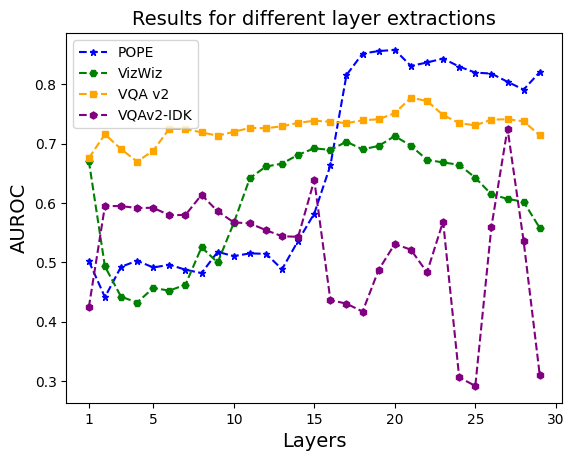

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Generate x values from 0 to 4π
x = np.arange(1,len(pope_scores)+1)



# Create the plot
plt.plot(x, pope_scores, linestyle='--',marker='*',color='blue',label='POPE',markersize=5)
plt.plot(x, vizwiz_scores, linestyle='--',marker='H',color='green',label='VizWiz',markersize=5)
plt.plot(x, vqa_scores, linestyle='--',marker='s',color='orange',label='VQA v2',markersize=5)
plt.plot(x, vqaidk_scores, linestyle='--',marker='h',color='purple',label='VQAv2-IDK',markersize=5)

# Add labels and title
plt.xlabel('Layers',fontsize=14)
plt.ylabel('AUROC',fontsize=14)
plt.title('(B) Results for different layer extractions',fontsize=14)

plt.xticks([1,5,10,15,20,25,30])  # Force integer ticks for layers

# Add a legend
plt.legend()
plt.savefig('results_layers.pdf',format="pdf",bbox_inches='tight')
# Show the plot
plt.show()
